In [1]:
import torch
print(torch.__version__)

2.4.1+cu121


In [2]:
!pip install torch==2.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import torch
print(torch.__version__)

2.2.1+cu121


In [2]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html


In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.1 MB/s eta 0:00:00


In [4]:
from tqdm import tqdm
from torch.optim import SparseAdam


def train(model, epochs=5, batch_size=32, lr=0.01, device='cpu'):
    model = model.to(device)

    loader = model.loader(batch_size=batch_size, shuffle=True, num_workers=1)

    optimizer = SparseAdam(list(model.parameters()), lr=lr)

    model.train()

    for epoch in range(epochs):
        train_loss = 0

        for pos_rw, neg_rw in tqdm(loader):
            optimizer.zero_grad()

            loss = model.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()

            optimizer.step()

            train_loss += loss.item()

        train_loss = train_loss / len(loader)

        print(f'Epoch: {epoch:02d}, Loss: {train_loss:.4f}')

In [5]:
from torch_geometric.datasets import Planetoid

In [6]:
data = Planetoid('data', 'Cora')

Processing...
Done!


In [8]:
data

Cora()

In [9]:
dataset = data[0]

In [10]:
dataset

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [12]:
dataset.x.detach().cpu().numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
dataset.y.detach().cpu().numpy()

array([3, 4, 4, ..., 3, 3, 3])

In [16]:
from torch_geometric.nn.models import Node2Vec

In [19]:
model_node2vec = Node2Vec(dataset.edge_index, embedding_dim=50, walk_length=30,
                          context_size=10, walks_per_node=20, num_negative_samples=1,
                          p=200, q=1, sparse=True)

In [20]:
train(model_node2vec, epochs=3, batch_size=16,
      lr=0.001, device='cpu')

100%|██████████| 170/170 [00:18<00:00,  9.34it/s]


Epoch: 00, Loss: 5.1920


100%|██████████| 170/170 [00:18<00:00,  9.16it/s]


Epoch: 01, Loss: 4.3448


100%|██████████| 170/170 [00:19<00:00,  8.65it/s]

Epoch: 02, Loss: 3.6880


In [21]:
model_node2vec

Node2Vec(2708, 50)

In [23]:
node_embeddings = model_node2vec().detach().cpu().numpy()

In [24]:
node_embeddings

array([[-0.22495797, -0.05821409,  0.7015704 , ..., -1.1653203 ,
        -1.1785815 ,  0.9351112 ],
       [ 0.4664533 ,  0.7050527 ,  0.6308002 , ..., -0.8120071 ,
         0.22620243,  0.5905037 ],
       [-0.6504791 , -0.5052036 , -3.2979875 , ...,  0.03140363,
         0.7603173 ,  0.3590942 ],
       ...,
       [ 0.24604678, -0.26939115, -0.97047895, ...,  0.45113936,
         1.5785881 , -0.550201  ],
       [-0.4466681 , -0.29092827,  0.12297014, ...,  1.4470601 ,
         1.2961134 ,  0.4800066 ],
       [ 0.05760192, -2.6836402 , -0.19956928, ...,  0.7896558 ,
         0.3361345 , -0.36237615]], dtype=float32)

In [25]:
from sklearn.manifold import TSNE

In [26]:
model_tsne = TSNE(n_components=2)

In [27]:
node_embeddings_2d = model_tsne.fit_transform(node_embeddings)

In [28]:
node_embeddings_2d

array([[-11.482699  ,   0.05850221],
       [ -1.4246715 ,   8.132083  ],
       [  6.2007833 ,  -0.50985837],
       ...,
       [ 12.996976  ,  -1.2744375 ],
       [  4.279788  ,  20.77551   ],
       [-17.667944  ,  11.061637  ]], dtype=float32)

In [29]:
import matplotlib.pyplot as plt

In [30]:
labels = dataset.y.detach().cpu().numpy()

In [31]:
labels

array([3, 4, 4, ..., 3, 3, 3])

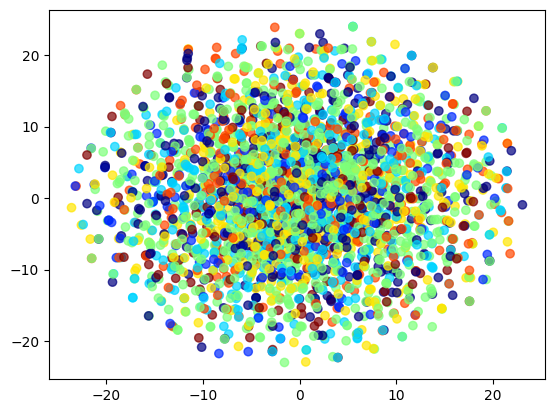

In [32]:
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=0)

In [35]:
model_rf.fit(node_embeddings, labels)

RandomForestClassifier(n_estimators=50, random_state=0)

In [36]:
from torch_geometric.datasets import Actor

In [37]:
data = Actor('data')

Processing...
Done!


In [38]:
data[0]

Data(x=[7600, 932], edge_index=[2, 30019], y=[7600], train_mask=[7600, 10], val_mask=[7600, 10], test_mask=[7600, 10])

In [39]:
data[0].x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])